## Trending Skills for Data Analyst in US

### Importing libraraies and data

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Filtering data for Data Analyst in United States

In [54]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()

### Get the month number for Job Posted date

In [55]:
df_DA_US['job_posted_month_num'] = df_DA_US['job_posted_date'].dt.month

### Explode the skills

In [56]:
df_DA_US_exploded = df_DA_US.explode('job_skills')

### Count the job skills for each month

In [57]:
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index='job_posted_month_num', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_num,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


### Calculate the sum of skills count for each month

Note: Added the 'Total' row to sum up the skills count

In [58]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

Deleted the column after calculating the sum of skills count.

In [59]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

### Calculate the total job postings each month

In [60]:
DA_Totals = df_DA_US.groupby('job_posted_month_num').size()

### Calculate the percentage of skills count for month with respect to total job postings

In [61]:
df_DA_US_percent = df_DA_US_pivot.div(DA_Totals/100, axis=0)
df_DA_US_percent

### Create a month name column and deleting the month number column

In [63]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_num'].apply(lambda x : pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns = "job_posted_month_num")

### Plot the trending skills for each month

46.44383010806735
38.32621261623524
27.1424981151043
19.602915305353104


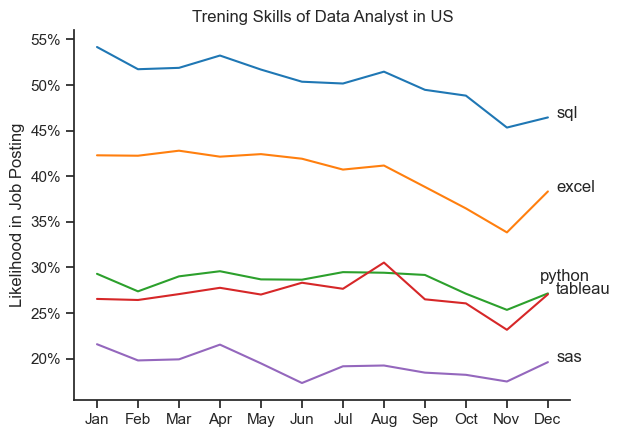

In [87]:
df_plot = df_DA_US_percent.iloc[:,:5]

sns.set_theme(style='ticks')

sns.lineplot(df_plot, dashes=False, palette='tab10')

plt.title('Trending Skills of Data Analyst in US')
plt.xlabel('')
plt.ylabel('Likelihood in Job Posting')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    if (int(df_plot.iloc[-1, i])) != (int(df_plot.iloc[-1, i-1])):
        print(df_plot.iloc[-1, i])
        plt.text(11.2,df_plot.iloc[-1, i], df_plot.columns[i])
    else:
        plt.text(10.8,(df_plot.iloc[-1, i]+1.5), df_plot.columns[i])

sns.despine()